In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import timeit
import h5py
from pathlib import Path
import numpy as np
from itertools import product, count
import pickle
import scipy.special
import scipy.stats
from math import exp
import multiprocessing
import functools

from montecarlo import *

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from montecarlo import *

In [63]:
parameters = dict(
J = 1,
U = 1,
t = 1,
mu = 0,
beta = 1,
N = 100,
alpha = 1.5,
normalise = True,
)

parameters['J_matrix'] = interaction_matrix(**parameters)

In [73]:
f_electrons = np.arange(parameters['N'])%2
perturbation = np.random.choice([1,-1], size=f_electrons.shape[0], p=[0.02,0.98])
perturbed_f_electrons = (f_electrons - 1/2) * perturbation + 1/2
state = perturbed_f_electrons
Ff, Fc, pert_evals, evecs = solve_H(state = state, **parameters)
extra_term = - parameters['U'] * np.sum(state - 1/2)/parameters['N']
pert_evals += extra_term

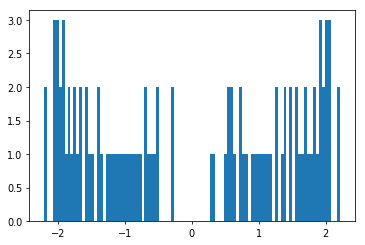

In [74]:
f, ax = plt.subplots()
ax.hist(pert_evals, bins = 100, orientation = 'vertical');

In [75]:
def TMM(disorder, E):
    a = -(E[None, :] + disorder[:, None])
    ones = np.ones(shape = a.shape, dtype = np.float64)

    matrices = np.array([
                        [a, -ones],
                        [ones, 0*ones]
                        ])
    
    matrices = np.einsum('ij...->...ij', matrices)
    acc = np.identity(2)[None, :, :]
    for m in matrices:
        #print(matrices.shape)
        acc = m @ acc
    return np.linalg.eigvals(acc)

def TMM(disorder, E, N):
    a = -(E[None, :] + disorder[:, None])
    ones = np.ones(shape = a.shape, dtype = np.float64)

    matrices = np.array([
                        [a, -ones],
                        [ones, 0*ones]
                        ])
    
    matrices = np.einsum('ij...->...ij', matrices)
    acc = np.identity(2)[None, :, :]
    for i in range(N):
        #print(matrices.shape)
        acc = m @ acc
    return np.linalg.eigvals(acc)
    
TMM(disorder = parameters['U']*perturbed_f_electrons, E = np.array([1,2,3]))

array([[-2.61803399e+00, -3.81966011e-01],
       [ 2.46136281e+28, -1.09951163e+12],
       [ 5.74599868e+49,  2.59614843e+33]])

/workspace/tch14/conda-envs/cmth_intelpython3_2/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


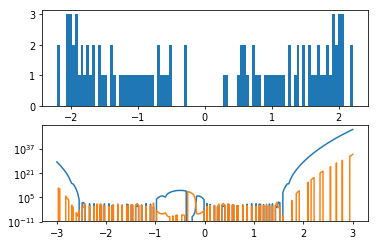

In [78]:
f, (ax, ax2) = plt.subplots(2)
ax.hist(pert_evals, bins = 100, orientation = 'vertical');
E = np.linspace(-3,3,200)
ax2.semilogy(E + extra_term, TMM(disorder = parameters['U']*perturbed_f_electrons, E=E))